In [45]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import numpy as np
import seaborn as sns

In [9]:
data = load_iris()

In [17]:
X = data.data

In [29]:
iris = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [31]:
iris['class'] = Y

In [33]:
iris.groupby('class').size()

class
0    50
1    50
2    50
dtype: int64

In [131]:
populatuion = pd.read_csv('US_Cities_Population.csv', encoding='latin')

In [161]:
populatuion.head()

,2015 rank,City,State,2015 estimate,2010 Census,Change,2014 land area,2010 population density,Location
0,1,New York,New York,8550405.0,8175133.0,0.045904,302.6,27012.0,40.6643°N 73.9385°W
1,2,Los Angeles,California,3971883.0,3792621.0,0.047266,468.7,8092.0,34.0194°N 118.4108°W
2,3,Chicago,Illinois,2720546.0,2695598.0,0.009255,227.6,11842.0,41.8376°N 87.6818°W
3,4,Houston,Texas,2296224.0,2100263.0,0.093303,599.6,3501.0,29.7805°N 95.3863°W
4,5,Philadelphia,Pennsylvania,1567442.0,1526006.0,0.027153,134.1,11379.0,40.0094°N 75.1333°W


In [107]:
populatuion.loc[populatuion['2010 Census'] == 0, 'Change'] = np.NaN

In [133]:
populatuion['Change'] = (populatuion['2015 estimate']- populatuion['2010 Census']) / populatuion['2010 Census']

In [134]:
populatuion.loc[populatuion['Change'] == np.inf, 'Change'] = 0

In [139]:
populatuion['2014 land area'] = populatuion['2014 land area'].str.split('\xa0').apply(lambda x: x[0])

In [138]:
populatuion['2010 population density'] = populatuion['2010 population density'].str.split('\xa0').apply(lambda x: x[0])

In [156]:
# populatuion['2010 population density'] = populatuion['2010 population density'].apply(lambda x: x.replace(',', ''))
populatuion['2014 land area'] = populatuion['2014 land area'].apply(lambda x: x.replace(',', ''))

In [160]:
populatuion.dtypes

2015 rank                    int64
City                        object
State                       object
2015 estimate              float64
2010 Census                float64
Change                     float64
2014 land area             float64
2010 population density    float64
Location                    object
dtype: object

In [159]:
populatuion['2010 population density'] = populatuion['2010 population density'].astype('float64')
populatuion['2014 land area'] = populatuion['2014 land area'].astype('float64')
populatuion['2010 Census'] = populatuion['2010 Census'].astype('float64')
populatuion['2015 estimate'] = populatuion['2015 estimate'].astype('float64')

In [66]:
ratio = populatuion.groupby('State').mean()['Change']
ratio = ratio.sort_values(ascending=False)

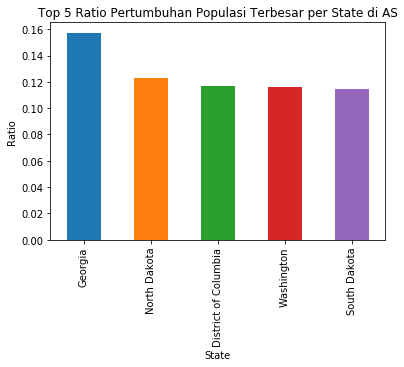

In [67]:
plt.title('Top 5 Ratio Pertumbuhan Populasi Terbesar per State di AS')
plt.ylabel('Ratio')
plt.xlabel('State')
ratio[:5].plot.bar()
plt.show()

In [166]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [203]:
kmn = KMeans(n_clusters=3, random_state=123)

In [204]:
X = populatuion.iloc[:, [3,4,6,7]]

In [205]:
df = pd.DataFrame(StandardScaler().fit_transform(X),index=X.index,columns=X.columns)

In [206]:
df = pd.concat([df, populatuion.iloc[:, 5]], axis=1)

In [207]:
kmn.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [208]:
kmn.labels_

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [222]:
# df = pd.concat([df, kmn.labels_], axis=1)
populatuion['cluster'] = kmn.labels_

In [213]:
df['state'] = populatuion['State']

In [214]:
df['city'] = populatuion['City']

In [239]:
# df.groupby(['state', 'cluster']).count()
populatuion.sort_values(by=['cluster']).head()

,2015 rank,City,State,2015 estimate,2010 Census,Change,2014 land area,2010 population density,Location,cluster
151,152,Salem,Oregon,164549.0,154637.0,0.064099,47.9,3229.0,44.9237°N 123.0231°W,0
206,207,Visalia,California,130104.0,124442.0,0.045499,36.2,3433.0,36.3272°N 119.3234°W,0
205,206,Gainesville,Florida,130128.0,124354.0,0.046432,61.3,2028.0,29.6788°N 82.3459°W,0
204,205,Roseville,California,130269.0,118788.0,0.096651,36.2,3279.0,38.7657°N 121.3032°W,0
203,204,New Haven,Connecticut,130322.0,129779.0,0.004184,18.7,6948.0,41.3108°N 72.9250°W,0


In [237]:
populatuion.groupby(['cluster']).count()

,2015 rank,City,State,2015 estimate,2010 Census,Change,2014 land area,2010 population density,Location
cluster,,,,,,,,,
0,285,285,285,285,285,285,285,285,285
1,1,1,1,1,1,1,1,1,1
2,18,18,18,18,18,18,18,18,18


In [227]:
from sklearn.mixture import GaussianMixture
gmn = GaussianMixture(n_components=3, random_state=123)

In [228]:
X = populatuion.iloc[:, [3,4,6,7]]

In [229]:
df = pd.DataFrame(StandardScaler().fit_transform(X),index=X.index,columns=X.columns)

In [230]:
df = pd.concat([df, populatuion.iloc[:, 5]], axis=1)

In [231]:
gmn.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=123, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [235]:
gmn.

array([0.25672018, 0.00986842, 0.7334114 ])